# **Detecção de Falhas em Equipamento** #

Este é um projeto de Data Science. Tem - se por objetivo avaliar e validar diferentes modelos de Machine Learning, com foco nos métodos que usam Aprendizado Supervisionado, a fim de encontrar o que melhor detecta possíveis falhas nos equipamentos.

A base de dados utilizada nesse projeto pode ser encontrada no [Kaggle](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset).

### **Bibliotecas Utilizadas** ###

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


### **Importando e Avaliando a Base de Dados** ###

In [3]:
# Importando a base
df = pd.read_csv('predictive_maintenance_dataset.csv')

In [4]:
# Visualizando a base
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
# Verificando a dimensão do df
print("Número de colunas:", df.shape[1])
print("Número de linhas:", df.shape[0])

Número de colunas: 12
Número de linhas: 124494


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
metric1,124494.0,1.223881e+08,7.045933e+07,0.0,61284762.0,122797388.0,183309640.0,244140480.0
metric2,124494.0,1.594927e+02,2.179678e+03,0.0,0.0,0.0,0.0,64968.0
metric3,124494.0,9.940897e+00,1.857481e+02,0.0,0.0,0.0,0.0,24929.0
metric4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
metric5,124494.0,1.422267e+01,1.594303e+01,1.0,8.0,10.0,12.0,98.0
metric6,124494.0,2.601727e+05,9.915108e+04,8.0,221452.0,249799.5,310266.0,689161.0
metric7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
metric9,124494.0,1.301385e+01,2.756612e+02,0.0,0.0,0.0,0.0,70000.0


In [8]:
# Verificando a coluna 'date'

### **Tratamento da Base de Dados** ###

Vamos verificar se há linhas duplicadas e se há valores NaN nas colunas.

In [9]:
# Número de Duplicadas
print("Número de linhas duplicadas:", df.duplicated().sum())

Número de linhas duplicadas: 1


Ou seja, temos uma linha que foi escrita duas vezes na nossa base. Vamos visualizar:

In [10]:
# Visualizando duplicadas
df[df.duplicated(keep = False)]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
101334,7/10/2015,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0
101335,7/10/2015,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


Vamos fazer o tratamento necessário e conferir se ele foi eficiente. Para isso, esperamos que a base de 124494 linhas tenha 124493 ao final da limpeza e que o número de duplicadas seja 0.

In [11]:
# Dropando linha duplicada
df.drop_duplicates(inplace = True)

# Verificando Limpeza
print("Número de linhas:", df.shape[0])

# Número de Duplicadas
print("Número de linhas duplicadas:", df.duplicated().sum())

Número de linhas: 124493
Número de linhas duplicadas: 0


In [12]:
# Verificando valores NaN nas colunas
df.isna().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

Observe que não temos valores NaN (Not a Number), dessa forma, não precisamos fazer uma limpeza ou tratamento.

### **Análise Exploratória dos Dados** ###


Avaliaremos:
- A quantidade total de equipamentos;
- Quais são os tipos de equipamento e suas quantidades;
- A quantidade total de equipamentos que falham e que não falham;
- A quantidade de equipamentos que falham e que não falham por tipo de equipamento;
- A quantidade de equipamentos que falham e que não falham por data;
- A quantidade de equipamentos que falham e que não falham por métrica;
- As distribuições das métricas;

In [13]:
# Verificando a quantidade total de equipamentos
print("Quantidade total de equipamentos:", df.shape[0])

Quantidade total de equipamentos: 124493


In [14]:
# Verificando os tipos de equipamento
print("Quantidade de tipos de equipamento:", df.device.unique().shape[0])

Quantidade de tipos de equipamento: 1169


In [15]:
# Verificando quantidade por tipo de equipamento
df.device.value_counts()

Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64

In [16]:
# Verificando a quantidade de equipamentos que falharam e que não falharam
print("Quantidade de equipamentos que falharam:", df.failure.sum())
print("Quantidade de equipamentos que não falharam:", df.shape[0] - df.failure.sum())

Quantidade de equipamentos que falharam: 106
Quantidade de equipamentos que não falharam: 124387


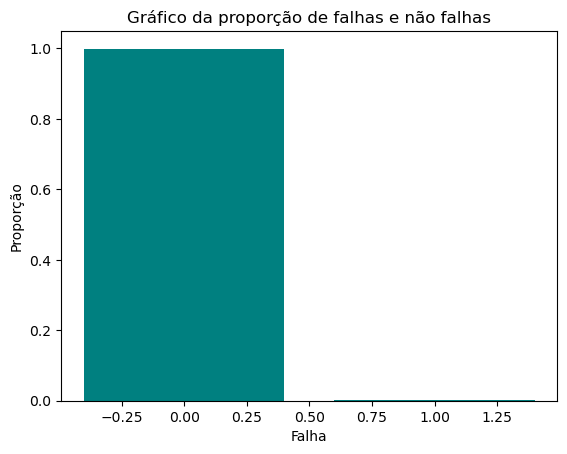

In [17]:
# Gráfico da proporção de falhas e não falhas
value_counts_failure = df.failure.value_counts(normalize=True)
plt.bar(value_counts_failure.index, value_counts_failure.values, color = '#008080')
plt.xlabel('Falha')
plt.ylabel('Proporção')
plt.title('Gráfico da proporção de falhas e não falhas') 
plt.show()

Do gráfico acima, podemos observar que estamos lidando com uma base muito desbalanceada. 

Agora, vamos ver a quantidade de falhas por 'device' para investigar se existe algum tipo de peça que tem mais probabilidade de falhar, dentre os tipos que falharam.

In [18]:
# Verificando quantidade de falhas por tipo de equipamento
df.groupby('device')['failure'].sum().sort_values(ascending=False)

device
Z1F0LSNZ    1
W1F1230J    1
Z1F0P5D9    1
S1F0L0DW    1
W1F1DQN8    1
           ..
S1F10QG6    0
S1F10QH3    0
S1F10QL8    0
S1F10RKC    0
Z1F2PBHX    0
Name: failure, Length: 1169, dtype: int64

Veja que as falhas relatadas são de tipos diferentes de equipamento, sendo mais clara, não existe um tipo de equipamento que relatou mais de um equipamento defeituoso. Dessa forma, dentre os equipamentos que falharam, não existe um tipo que tem maior possibilidade de falha.

Contudo, de todos os tipos, podemos enumerar quais foram os que falharam.

In [19]:
# Equipamentos que falharam 
df[df['failure'] == 1]['device']

4885      S1F0RRB1
6879      S1F0CTDN
8823      W1F0PNA5
11957     W1F13SRV
12668     W1F1230J
            ...   
109927    W1F1CB5E
114251    Z1F0MRPJ
122118    S1F0JGJV
122808    Z1F14BGY
124329    W1F0T0B1
Name: device, Length: 106, dtype: object

### **Separação dos Dados em Treino e Teste** ###

### **Criação dos Modelos de Previsão** ###

### **Métricas Obtidas** ###

### **Escolha do Modelo** ###

### **Otimização do Modelo** ###

### **Criação de um Pipeline Final** ###

### **Conclusão** ###